In [2]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

In [56]:
# Implementação do nosso bungee jumping

# Parâmetros do nosso modelo
g = 9.8 # Aceleração da gravidade, em m/s2
m = 80 # Massa da pessoa
𝜌 = 1.204 # Densidade do ar, em kg/m3
Cd = 0.5
h = 1.70 # Altura da pessoa
A = (m*h)/3600 # Área da secção transversal da pessoa
l0 = 100 # Comprimento inicial da corda
vt = 54 # Velocidade terminal do corpo humano em m/s

# Condições iniciais
y = -100
vy = 0

# Listas que serão usadas no ODEINT
dt = 1e-3
ls_tempo = np.arange(0, 50, dt)
cond_inicial = [y,vy]

# Damping
D = ((m*g)/vt)

# Função que implementa o nosso modelo
def modelo(X,t):
    #D=100
    y = X[0]
    vy = X[1]
    x = (y-l0)
    Ar = (0.5*𝜌*Cd*A*vy**2)
    k = 255
    dhdt = vy
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    derivadas = [dhdt,dvydt]
    return derivadas

result = odeint(modelo,cond_inicial,ls_tempo)
h = result[:,0]

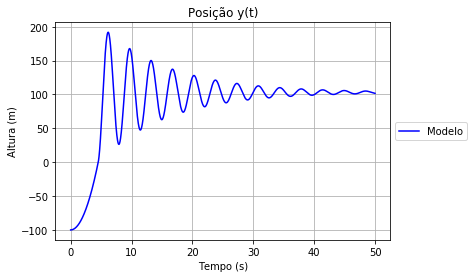

In [57]:
# Plotando gráfico
plt.title("Posição y(t)")
plt.plot(ls_tempo,h, 'b-', label="Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()